In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

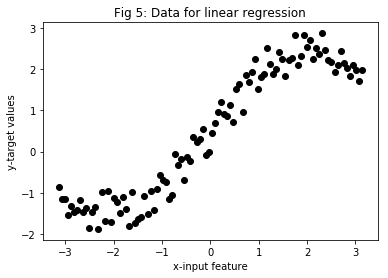

In [2]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

In [3]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

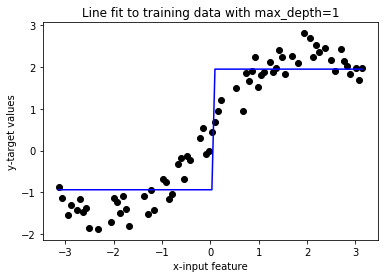

Training MSE:  0.327539609726 
Validation MSE:  0.511727247086 
Test MSE:  0.421232969751


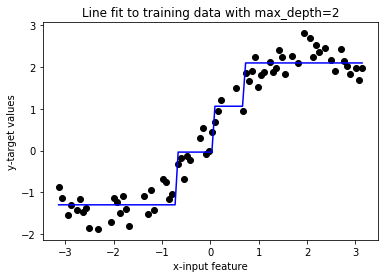

Training MSE:  0.0990810436676 
Validation MSE:  0.274007000903 
Test MSE:  0.0927525544842


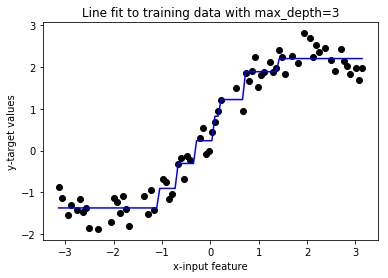

Training MSE:  0.0658074104192 
Validation MSE:  0.203375537167 
Test MSE:  0.0926076303728


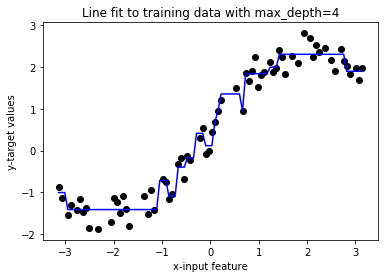

Training MSE:  0.0454175480103 
Validation MSE:  0.215173223848 
Test MSE:  0.100706310732


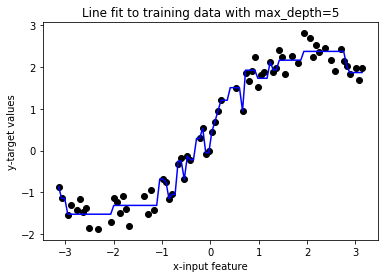

Training MSE:  0.032686717976 
Validation MSE:  0.209334701114 
Test MSE:  0.133978752896


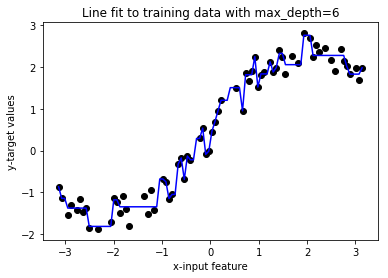

Training MSE:  0.0164755099844 
Validation MSE:  0.261532952204 
Test MSE:  0.167036568932


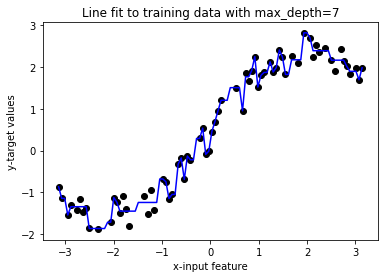

Training MSE:  0.0109027041975 
Validation MSE:  0.269581530117 
Test MSE:  0.14892908849


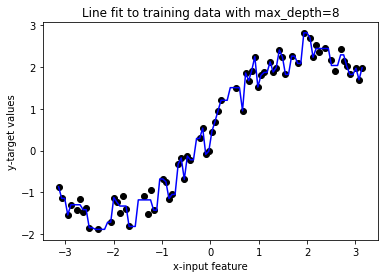

Training MSE:  0.00542823581672 
Validation MSE:  0.309494609805 
Test MSE:  0.153429683346


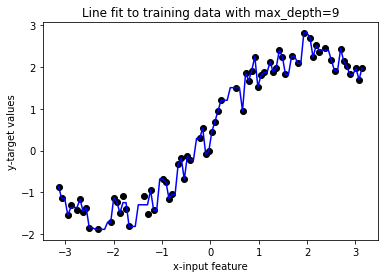

Training MSE:  0.0020929087798 
Validation MSE:  0.310438726634 
Test MSE:  0.142547550321


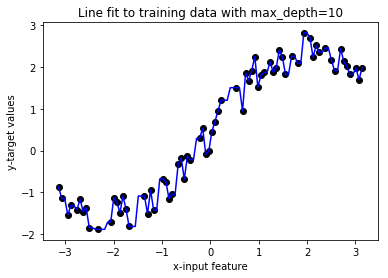

Training MSE:  0.0 
Validation MSE:  0.314892240453 
Test MSE:  0.167450829477


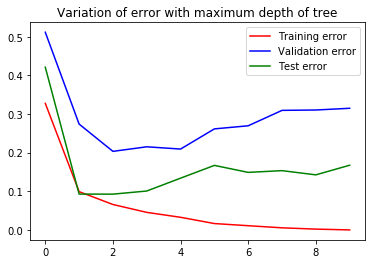

In [5]:
   maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()